## Assignment 8: Unsupervised Learning
###  Jiayu Chen (jic117)  Huan Chen (huc48)  Chang Tian (cht97)
For the following two data sets, originating from the Irvine Machine Learning Repository (http://archive.ics.uci.edu/ml/):

Iris (http://archive.ics.uci.edu/ml/datasets/Iris)<br>
Congressional Voting Records (http://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)<br>

Build clustering models the result based on each of these algorithms:
1. K-means (Bonus if initializing with K-means++)<br>
2. Gaussian Mixture Model<br>
3. Hierarchical Clustering<br>

Note: You also need to demonstrate how to determine the number of clusters based on one of these methods: elbow, BIC, or Silhouette<br>

Visualize both datasets based on each of these algorithms:<br>
1. PCA<br>
2. Autoencoder (t-sne)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import mglearn

# IRIS

In [2]:
iris_dataset=load_iris()
print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_df['target']=iris_dataset.target
X = iris_df.iloc[:,range(0,4)]
Y = iris_df.iloc[:, 4]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Selecting the number of clusters with silhouette analysis on KMeans clustering
The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [4]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, silhouette_samples
range_n_clusters = [2, 3, 4, 5, 6, 7]
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++').fit(X)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    adj_rand_score = adjusted_rand_score(cluster_labels, Y)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    print("k: %d, silhouette score: %f, adj rand score: %f, " % (k, silhouette_avg, adj_rand_score))

k: 2, silhouette score: 0.680814, adj rand score: 0.539922, 
k: 3, silhouette score: 0.552592, adj rand score: 0.730238, 
k: 4, silhouette score: 0.497826, adj rand score: 0.649818, 
k: 5, silhouette score: 0.492856, adj rand score: 0.615484, 
k: 6, silhouette score: 0.368206, adj rand score: 0.446168, 
k: 7, silhouette score: 0.360060, adj rand score: 0.480637, 


When k=2, the silhouette score is highest if it is unsupervised learning. 
But if it is supervised learning, we should choose k = 3 because it's adjusted rand score is highest comparing to the true lable.

## 1. k-means

predicted result when k=2:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Plot of predicted classify when k=2


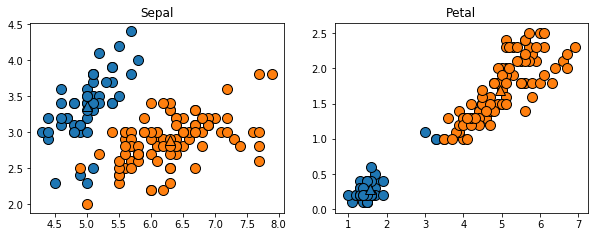

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score

k=2
kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
cluster_labels = kmeans.fit_predict(X)
print('predicted result when k=%d:\n' %k, cluster_labels)

print('Plot of predicted classify when k=2')
plt.figure(figsize=(10,3.5)) 
plt.subplot(1, 2, 1) 
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1], markers='^', markeredgewidth=1)
plt.title('Sepal') 

plt.subplot(1, 2, 2) 
mglearn.discrete_scatter(X.iloc[:, 2], X.iloc[:, 3], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], [0, 1], markers='^', markeredgewidth=1)
plt.title('Petal') 
plt.show() 

predicted result when k=3:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Plot of predicted classify when k=2


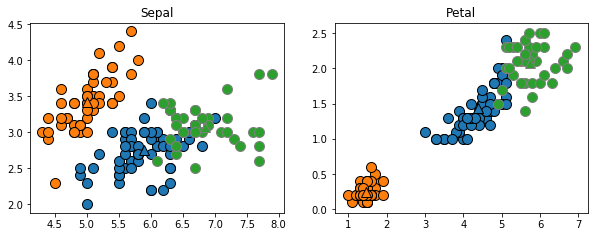

In [18]:
%matplotlib inline
import mglearn

k=3
kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
cluster_labels = kmeans.fit_predict(X)
print('predicted result when k=%d:\n' %k, cluster_labels)

print('Plot of predicted classify when k=2')
plt.figure(figsize=(10,3.5)) 
plt.subplot(1, 2, 1) 
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=1)
plt.title('Sepal') 

plt.subplot(1, 2, 2) 
mglearn.discrete_scatter(X.iloc[:, 2], X.iloc[:, 3], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], [0, 1, 2], markers='^', markeredgewidth=1)
plt.title('Petal') 
plt.show()  

## 2. Gaussian Mixture Model

In [19]:
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
Y.columns = ['T']

In [20]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, silhouette_samples
range_n_clusters = [2, 3, 4, 5, 6, 7]
for k in range_n_clusters:
    gmm = GaussianMixture(n_components=k).fit(X)
    cluster_labels = gmm.predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    adj_rand_score = adjusted_rand_score(cluster_labels, Y)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    print("k: %d, silhouette score: %f, adj rand score: %f, " % (k, silhouette_avg, adj_rand_score))

k: 2, silhouette score: 0.686393, adj rand score: 0.568116, 
k: 3, silhouette score: 0.500947, adj rand score: 0.903874, 
k: 4, silhouette score: 0.405115, adj rand score: 0.764011, 
k: 5, silhouette score: 0.457639, adj rand score: 0.656422, 
k: 6, silhouette score: 0.278164, adj rand score: 0.518585, 
k: 7, silhouette score: 0.226140, adj rand score: 0.516188, 


So we will choose 2 as the K value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

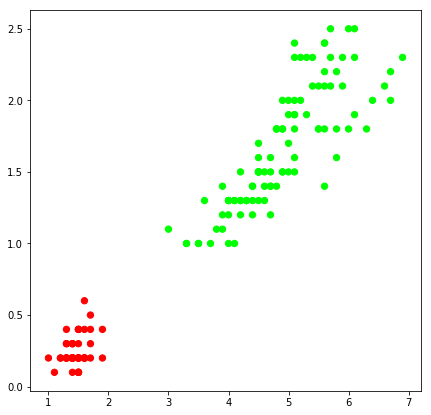

In [11]:
colormap = np.array(['red', 'lime', 'black'])
plt.figure(figsize=(7,7))
gmm = GaussianMixture(n_components=2).fit(X)
labels = gmm.predict(X)
plt.scatter(X.petal length (cm), X.petal width (cm), c=colormap[labels], s=40)
labels

## 3. Hierarchical Clustering

In [32]:
X = iris_df.iloc[:,range(0,4)]
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
Y = iris_df.iloc[:, 4]

In [33]:
# Now let us apply Hierarchical Clustering which is implemented in scikit-learn as AgglomerativeClustering
for n_clusters in range(2,11):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(X)
    # use Average Silhouette method to determine the number of clusters
    silhouette_avg = silhouette_score(X,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)

For n_clusters = 2 The average silhouette_score is: 0.6863930543204848
For n_clusters = 3 The average silhouette_score is: 0.5540972907866913
For n_clusters = 4 The average silhouette_score is: 0.4887398490660781
For n_clusters = 5 The average silhouette_score is: 0.48415535258966824
For n_clusters = 6 The average silhouette_score is: 0.3618845149152426
For n_clusters = 7 The average silhouette_score is: 0.34485408931698447
For n_clusters = 8 The average silhouette_score is: 0.34624053091042023
For n_clusters = 9 The average silhouette_score is: 0.3331385062859324
For n_clusters = 10 The average silhouette_score is: 0.3291603113288494


From the results showed above, we can see that Silhouette score is the highest when the number of clusters is equal to two.

In [34]:
cluster_2_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_labels = cluster_2_model.fit_predict(X)
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

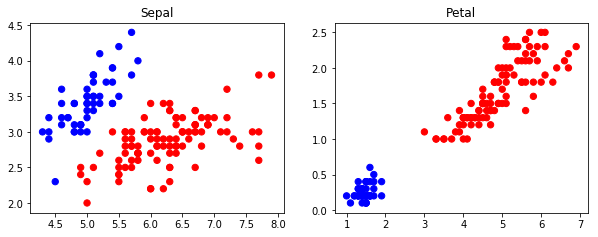

In [35]:
colormap = np.array(['red', 'blue'])
plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[cluster_labels], s=40)
plt.title('Sepal') 

plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[cluster_labels], s=40)
plt.title('Petal') 

plt.show() 

## Visualize the dataset based on PCA

In [36]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
pca = PCA(n_components=2) # keep the first two principal components of the data
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) # transform data onto the first two principal components
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (150, 4)
Reduced shape: (150, 2)


Text(0,0.5,'Second principal component')

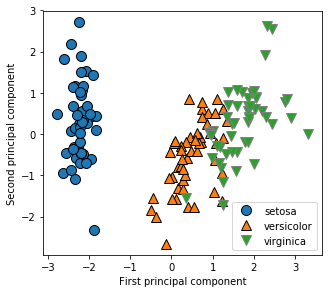

In [37]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(5, 5))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], Y)
plt.legend(iris_dataset.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

PCA component shape: (2, 4)
PCA components:
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


Text(0,0.5,'Principal components')

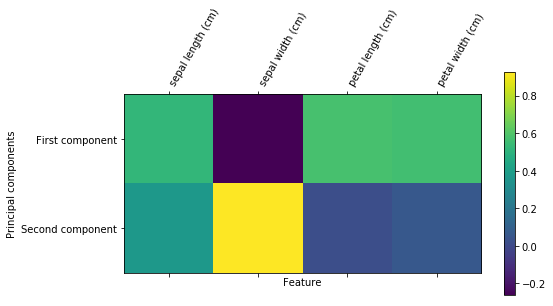

In [38]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(iris_dataset.feature_names)), iris_dataset.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Visualization based on t-sne

In [39]:
rndperm = np.random.permutation(iris_df.shape[0])

In [40]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(iris_df.loc[rndperm[:n_sne],iris_dataset.feature_names].values)
# tsne_results = tsne.fit_transform(iris_df)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.669058
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.016865
[t-SNE] Error after 300 iterations: 0.090104
t-SNE done! Time elapsed: 0.7742090225219727 seconds


/usr/local/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


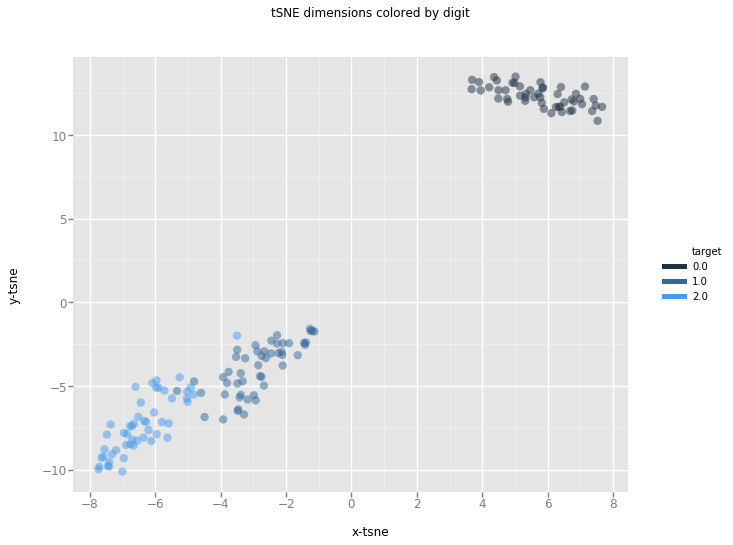

<ggplot: (271710605)>

In [41]:
from ggplot import *
iris_df_tsne = iris_df.loc[rndperm[:n_sne],:].copy()
iris_df_tsne['x-tsne'] = tsne_results[:,0]
iris_df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( iris_df_tsne, aes(x='x-tsne', y='y-tsne', color='target') ) \
        + geom_point(size=70,alpha=0.5) \
        + ggtitle("tSNE dimensions colored by digit")
chart

# VOTING
### Selecting the number of clusters with silhouette analysis on KMeans clustering

In [43]:
voting = pd.read_csv('house-votes-84.csv')
voting.replace('n',0, inplace=True)
voting.replace('y',1, inplace=True)
voting.replace('w',2,inplace=True)
voting.replace('republican', 0, inplace=True)
voting.replace('democrat', 1, inplace=True)
target_names = ['republican', 'democrat']
feature_names = ['handicapped-infants','water-project-cost-sharing', 'adoption-of-the-budget-resolution',
                 'physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban',
                 'aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback',
                 'education-spending','superfund-right-to-sue','crime','duty-free-exports',
                 'export-administration-act-south-africa']
X = voting.iloc[:, range(1,17)]
Y = voting.iloc[:, 0]
voting.head()

,Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,nti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_sa
0,0,0,1,0,1,1,1,0,0,0,1,2,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,2
2,1,2,1,1,2,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,2,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,2,1,1,1,1


In [44]:
voting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
Party                                435 non-null int64
handicapped_infants                  435 non-null int64
water_project_cost_sharing           435 non-null int64
adoption_of_the_budget_resolution    435 non-null int64
physician_fee_freeze                 435 non-null int64
el_salvador_aid                      435 non-null int64
religious_groups_in_schools          435 non-null int64
nti_satellite_test_ban               435 non-null int64
aid_to_nicaraguan_contras            435 non-null int64
mx_missile                           435 non-null int64
immigration                          435 non-null int64
synfuels_corporation_cutback         435 non-null int64
education_spending                   435 non-null int64
superfund_right_to_sue               435 non-null int64
crime                                435 non-null int64
duty_free_exports                    435 non-null int64

In [45]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, silhouette_samples
range_n_clusters = [2, 3, 4, 5, 6, 7]
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++').fit(X)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    adj_rand_score = adjusted_rand_score(cluster_labels, Y)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    print("k: %d, silhouette score: %f, adj rand score: %f, " % (k, silhouette_avg, adj_rand_score))

k: 2, silhouette score: 0.280019, adj rand score: 0.536722, 
k: 3, silhouette score: 0.264670, adj rand score: 0.409714, 
k: 4, silhouette score: 0.193011, adj rand score: 0.276285, 
k: 5, silhouette score: 0.172570, adj rand score: 0.296189, 
k: 6, silhouette score: 0.155679, adj rand score: 0.281249, 
k: 7, silhouette score: 0.102711, adj rand score: 0.212700, 


The score of silhouette analysis is highest when k=2, which is same as the truth lable.

## 1. k-means

In [46]:
kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
cluster_labels= kmeans.fit_predict(X)
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1
 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1
 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0
 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0]


## 2. Gaussian Mixture Model

In [51]:
DataHouseVotes = pd.read_csv('house-votes-84.csv')
DataHouseVotes.head()

,Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,nti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_sa
0,republican,n,y,n,y,y,y,n,n,n,y,w,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,w
2,democrat,w,y,y,w,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,w,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,w,y,y,y,y


In [52]:
df=DataHouseVotes
df.replace('n',0, inplace=True)
df.replace('y',1, inplace=True)
df.replace('w', 2,inplace=True)
df.replace('republican', 1,inplace=True)
df.replace('democrat', 0,inplace=True)
X=df.iloc[:, range(1,17)] 
Y=df.iloc[:, 0]

In [53]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, silhouette_samples
range_n_clusters = [2, 3, 4, 5, 6, 7]
for k in range_n_clusters:
    gmm = GaussianMixture(n_components=k).fit(X)
    cluster_labels = gmm.predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    adj_rand_score = adjusted_rand_score(cluster_labels, Y)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    print("k: %d, silhouette score: %f, adj rand score: %f, " % (k, silhouette_avg, adj_rand_score))

k: 2, silhouette score: 0.261644, adj rand score: 0.483985, 
k: 3, silhouette score: 0.232058, adj rand score: 0.433784, 
k: 4, silhouette score: 0.183379, adj rand score: 0.459679, 
k: 5, silhouette score: 0.127836, adj rand score: 0.260283, 
k: 6, silhouette score: 0.093332, adj rand score: 0.259748, 
k: 7, silhouette score: 0.108341, adj rand score: 0.228027, 


So we will choose 2 as the K value

In [54]:
gmm = GaussianMixture(n_components=2).fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,

## 3. Hierarchical Clustering

In [55]:
# Now let us apply Hierarchical Clustering which is implemented in scikit-learn as AgglomerativeClustering
for n_clusters in range(2,11):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(X)
    # use Average Silhouette method to determine the number of clusters
    silhouette_avg = silhouette_score(X,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)

For n_clusters = 2 The average silhouette_score is: 0.2625270613638757
For n_clusters = 3 The average silhouette_score is: 0.24233635007215115
For n_clusters = 4 The average silhouette_score is: 0.23567193187804691
For n_clusters = 5 The average silhouette_score is: 0.1758600937654626
For n_clusters = 6 The average silhouette_score is: 0.17454586488350157
For n_clusters = 7 The average silhouette_score is: 0.13345878514038148
For n_clusters = 8 The average silhouette_score is: 0.12276495653343739
For n_clusters = 9 The average silhouette_score is: 0.10151895460562334
For n_clusters = 10 The average silhouette_score is: 0.10731912233648364


From the results showed above, we can see that Silhouette score is the highest when the number of clusters is equal to two.

In [56]:
# when the number of clusters is equal to two
cluster_2_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_labels = cluster_2_model.fit_predict(X)
cluster_labels

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

## Visualize the dataset based on PCA

In [57]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
pca = PCA(n_components=2) # keep the first two principal components of the data
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) # transform data onto the first two principal components
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (435, 16)
Reduced shape: (435, 2)


Text(0,0.5,'Second principal component')

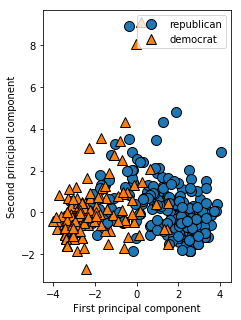

In [58]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(5, 5))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], Y)
plt.legend(target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [59]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 16)
PCA components:
[[ 0.20564796 -0.03915765  0.29739332 -0.31513916 -0.32872498 -0.26303692
   0.29827937  0.31109511  0.3177761  -0.00494334  0.05402493 -0.25365696
  -0.26054096 -0.28465226  0.22320361  0.19602509]
 [ 0.17534441  0.35255226  0.22950159  0.13949965  0.18027099  0.31448182
   0.17280107  0.24553329  0.09813864  0.19683982  0.42341017  0.19681519
   0.29955711  0.2319147   0.21441656  0.30887541]]


Text(0,0.5,'Principal components')

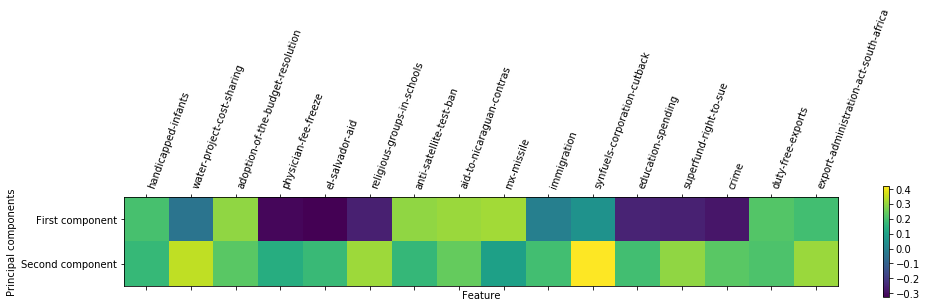

In [60]:
plt.figure(figsize=(5, 5))
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(feature_names)), feature_names, rotation=70, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Visualization based on t-sne

In [64]:
iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_df['target']=iris_dataset.target

In [65]:
import time

from sklearn.manifold import TSNE

n_sne = 3000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(voting)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 435 samples in 0.001s...
[t-SNE] Computed neighbors for 435 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 435 / 435
[t-SNE] Mean sigma: 0.912704
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.247379
[t-SNE] Error after 300 iterations: 0.791780
t-SNE done! Time elapsed: 2.834845781326294 seconds


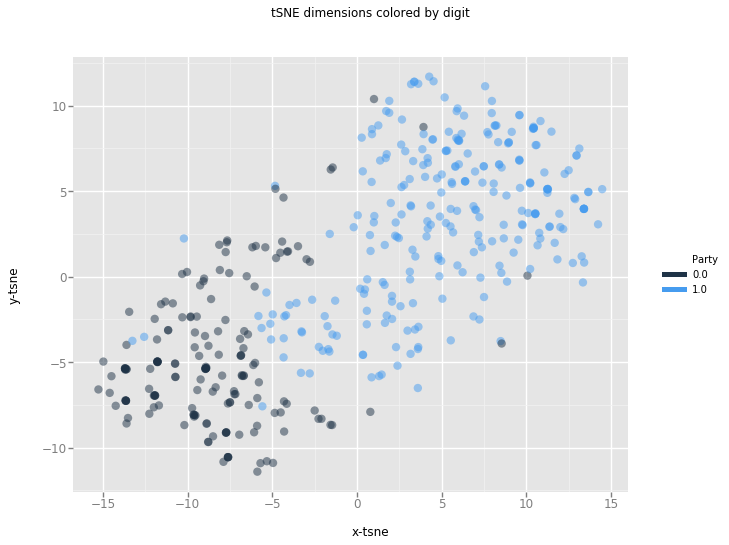

<ggplot: (-9223372036575059568)>

In [67]:
from ggplot import *
voting_tsne = voting.copy()
voting_tsne['x-tsne'] = tsne_results[:,0]
voting_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( voting_tsne, aes(x='x-tsne', y='y-tsne', color='Party') ) \
        + geom_point(size=70,alpha=0.5) \
        + ggtitle("tSNE dimensions colored by digit")
chart